<a href="https://colab.research.google.com/github/ayuksekdag/winacademy_python_dna/blob/main/Copy_of_Shark_Attacks_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solutions to Shark Attacks
This assignemnt can be completed in various different ways, based on the made assumptions. Therefore the answers can differ a lot, and this is just an indication of how it can be done.

##Global features:
While doing the exercise, try to include these features
- Your code is well organized code
- Attempt to use generalized functions to sort/explore/ingest the data
- Use legends, axis labels, and clear/readable figures
- As this is a notebook, explain made assumptions well
- Do not write the dataframes yourself, use functions instead


##About conclusions:
You may think that you can not draw conclusions from this dataset alone because it could be biased (white shark is notarious thus will be often recognized). That's ok, but nevermind, this exercise is about coding AND drawing conclusions.

#Importing data and modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import re

df_pre = pd.read_csv("https://raw.githubusercontent.com/lisannebleiksch/Winc_academy_DA/main/Data/attacks.csv", encoding = "ISO-8859-1")

#Ingesting and Exploring Data
- Be aware of the amount of missing values
- Drop useless columns
- Drop rows if all columns contain Nan values


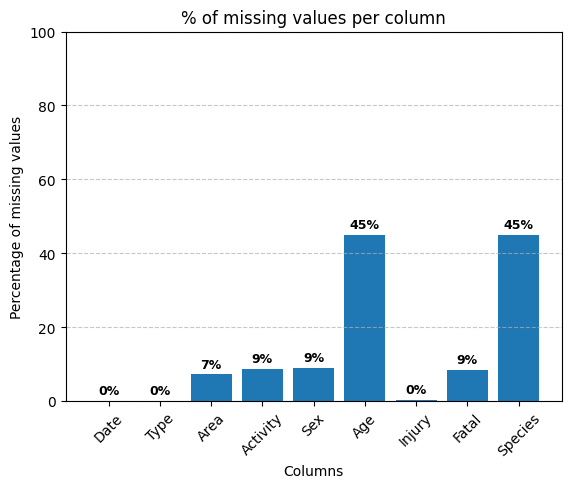

In [3]:
## Subtract information about the dataframe
# print(df_pre.columns)
# print(df_pre.describe())
# print(df_pre.info())
# print("length of total dataframe is: ", len(df_pre))

## Remove useless columns
df_columns = df_pre.drop(columns=['Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23', 'Case Number', 'Year', 'Country', 'Location', 'Time', 'Name'])

df_columns.rename(columns={"Fatal (Y/N)": "Fatal", "Species ": "Species", "Sex ": "Sex"}, inplace=True)

df = df_columns.dropna(how="all")
# df.info()


## Plot the percentage of missing values to get some insight in the dataframe
fig, ax = plt.subplots()

data = df.columns
percentage_missing = (df.isnull().sum()/len(df) *100).tolist()

ax.bar(data, percentage_missing)

plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.title('% of missing values per column')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add text annotations to display percentages on top of the bars
for i, v in enumerate(percentage_missing):
    ax.text(i, v + 1, f"{v:.0f}%", ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.show()


#Question 1
##What are the most dangerous types of sharks to humans?

##Ideas to think about:
- Explain assumptions: what does dangerous mean? Fatal or just an attack?
- How is the filtering done
- Use of figures?

Optional: Look for fatal attacks in the injury column

##Made Assumptions:
- Dangerous translate to number of attacks, showing the portion of fatal attacks
- In the fatal column there are some unexplained definitions which are mapped to None
- The filter function is based on the occurance of the word shark and its perceding word, therefore when species is mentioned after the word shark it will not be categorized by the filter function. Another option to filter this data is by creating a list/map including a list of species and search the dataset for those words.  
- Percentage of missing values in the species column is 45%, they have not been taken into account.
- Percentage of missing values in the fatal column is 9%, they have not been taken into account.

#Conclusion
The white shark has the highest number of attacks under its name with a 22% of fatal outcome. This percentage is average the average of all attacks with fatal outcome. For tiger shark and bull shark the percentages are respectively 26% and 20%. Indicating that when looking at the percentage of fatal attacks the tiger shark is more dangerous, but when looking at highest number of (fatal) attacks the White shark is more dangerous.

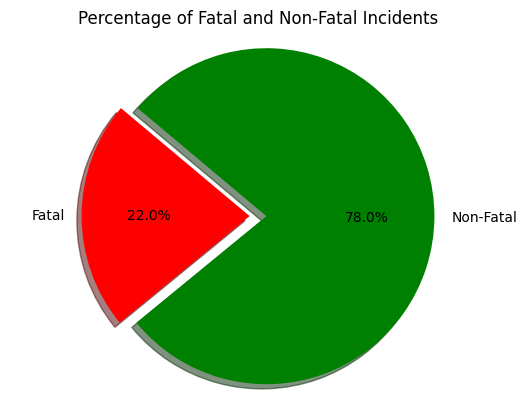

In [4]:
# Create dataframe for question 1
dangerous_df = df.copy()

# Convert the 'Fatal' column to uppercase and strip whitespace
dangerous_df['Fatal'] = dangerous_df['Fatal'].str.upper().str.strip()

# Define a mapping dictionary for replacements
fatal_mapping = {
    'M': None,        # Assumption 1
    '2017': None,     # Assumption 2
    'UNKNOWN': None,
    'N': False,
    'Y': True
}

# Replace values based on the mapping
dangerous_df['Fatal'] = dangerous_df['Fatal'].replace(fatal_mapping)

# Cast the 'Fatal' column to boolean type
dangerous_df['Fatal'] = dangerous_df['Fatal'].astype('boolean')

# Calculate the percentage of True and False values in the 'Fatal' column
total_fatal_sum = dangerous_df['Fatal'].sum()
false_fatal_count = len(dangerous_df) - total_fatal_sum
event_count = len(dangerous_df)

true_percentage = (total_fatal_sum / event_count) * 100
false_percentage = (false_fatal_count / event_count) * 100


# Create the pie chart
labels = ['Fatal', 'Non-Fatal']
sizes = [true_percentage, false_percentage]
colors = ['red', 'green']
explode = (0.1, 0)  # Explode the first slice (True) to make it stand out a bit

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of Fatal and Non-Fatal Incidents')
plt.show()


In [5]:
## Option 1
# Shark filter function based on occurance of the word shark and the perceding word

def filter_shark(input_string):
    # Remove punctuation by replacing them with spaces, convert to lowercase, and split the string into words
    words = input_string.translate(str.maketrans('', '', string.punctuation)).lower().split()

    # Look for the index of the word "shark" or "sharks"
    idx_shark = words.index('shark') if 'shark' in words else -1
    idx_sharks = words.index('sharks') if 'sharks' in words else -1

    idx = max(idx_shark, idx_sharks)

    if idx != -1:
        # If "shark" or "sharks" is the first word or the word before is one letter, return input_string; otherwise, return the word before "shark" or "sharks" and the word itself
        if idx == 0 or len(words[idx - 1]) == 1:
            return input_string
        else:
            return words[idx - 1].capitalize() + ' ' + words[idx]
    else:
        return input_string  # Return input_string

In [6]:
# ## Option 2
# # Write function that filters the dataframe based on this list

# shark_species_list = [
#     "Great White Shark",
#     "Whale Shark",
#     "Hammerhead Shark",
#     "Bull Shark",
#     "Tiger Shark",
#     "Blue Shark",
#     "Blacktip Reef Shark",
#     "Caribbean Reef Shark",
#     "Nurse Shark",
#     "Lemon Shark",
#     "Silky Shark",
#     "Mako Shark",
#     "Thresher Shark",
#     "Angel Shark",
#     "Basking Shark",
#     "Blacktip Shark",
#     "Zebra Shark",
#     "Wobbegong Shark",
#     "Oceanic Whitetip Shark",
#     "Spinner Shark",
#     "Dusky Shark",
#     "Sand Tiger Shark",
#     "Greenland Shark",
#     "Shortfin Mako Shark",
#     "Spiny Dogfish",
#     "Goblin Shark",
#     "Megamouth Shark",
#     "Porbeagle Shark",
#     "Sharpnose Shark",
#     "Bramble Shark",
#     "White-tip Reef Shark",
#     "Scalloped Hammerhead",
#     "Pacific Angelshark",
#     "Horn Shark",
#     "Smooth Hammerhead",
#     "Grey Reef Shark",
#     "Sandbar Shark",
#     "Sixgill Shark",
#     "Blacknose Shark",
#     "Galapagos Shark",
#     "Swellshark",
#     "Leopard Shark",
#     "Bigeye Thresher Shark",
#     "Frilled Shark",
#     "Bluntnose Sixgill Shark",
#     "Atlantic Sharpnose Shark",
#     "Carpet Shark",
#     "Pygmy Shark"
# ]


# def filter_shark(input_string):
#     # First, check if any species in shark_species_list are in the input_string
#     for species in shark_species_list:
#         if species.lower() in input_string.lower():
#             return species

#     # If no species match is found, continue with the original function
#     words = input_string.translate(str.maketrans('', '', string.punctuation)).lower().split()
#     idx_shark = words.index('shark') if 'shark' in words else -1
#     idx_sharks = words.index('sharks') if 'sharks' in words else -1

#     idx = max(idx_shark, idx_sharks)

#     if idx != -1:
#         if idx == 0 or len(words[idx - 1]) == 1:
#             return input_string
#         else:
#             return words[idx - 1].capitalize() + ' ' + words[idx]
#     else:
#         return input_string  # Return input_string

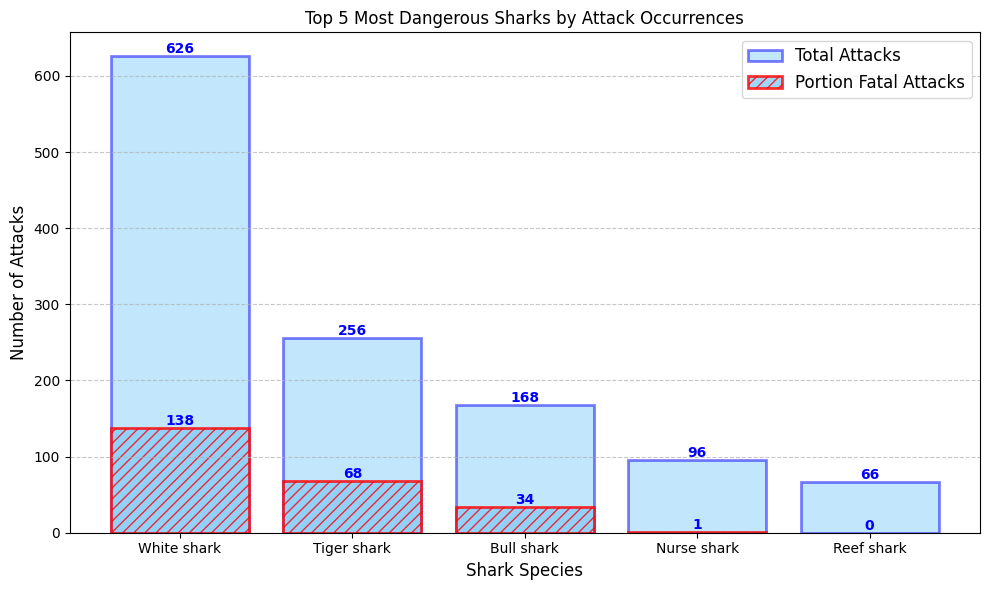

In [7]:
# Apply filter function on the non-nan values
dangerous_df.dropna(subset=['Species'], inplace=True)
dangerous_df["Total_species"]= dangerous_df['Species'].apply(filter_shark)

# Remove rows where "Total_species" contains "unconfirmed", "not confirmed", or "invalid"
dangerous_df = dangerous_df[~dangerous_df['Total_species'].str.contains('unconfirmed|not confirmed|invalid', case=False)]

# Group by species, count the occurrences, and sort by counts
total_counts = dangerous_df.groupby('Total_species').size().sort_values(ascending=False)

# Take the top 5
top_5_dangerous_sharks = total_counts.head(5)

# Group the fatal occurrences by species and count them
fatal_counts = dangerous_df[dangerous_df['Fatal'] == True].groupby('Total_species').size()

# Match the fatal counts with the top 5 dangerous sharks
top_5_fatal_counts = fatal_counts[fatal_counts.index.isin(top_5_dangerous_sharks.index)]

# Merge the data
final_fatal_df = pd.DataFrame({'Total Attacks': top_5_dangerous_sharks, 'Fatal Attacks': top_5_fatal_counts})
final_fatal_df['Fatal Percentage'] = (final_fatal_df['Fatal Attacks'] / final_fatal_df['Total Attacks']) * 100

# Sort the DataFrame by 'Total Attacks' in descending order for the figure
final_fatal_df = final_fatal_df.sort_values('Total Attacks', ascending=False)


# Plot the Data
fig, ax = plt.subplots(figsize=(10,6))

# Iterate over categories and create bars
for attacks, color, edgecolor, alpha, hatch, label in [('Total Attacks', 'lightskyblue', 'blue', 0.5, None, 'Total Attacks'),
                                                       ('Fatal Attacks', 'lightskyblue', 'red', 0.8, '///', 'Portion Fatal Attacks')]:
    bars = ax.bar(final_fatal_df.index, final_fatal_df[attacks], label=label, color=color, edgecolor=edgecolor, linewidth=2, alpha=alpha, hatch=hatch)

    # Annotate each bar with the corresponding value
    for bar in bars:
        height = bar.get_height()
        if np.isnan(height):
            height = 0
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',color='blue', fontweight='bold', ha='center', va='bottom')


# Add labels and title
plt.xlabel('Shark Species', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 5 Most Dangerous Sharks by Attack Occurrences')
plt.xticks(rotation=0) # Rotates x-axis labels if they are long
plt.legend(loc='upper right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Improve spacing between elements
plt.show()

#Question 2
##Are children more likely to be attacked by sharks?


##Ideas to think about
- Explain assumptions: What does children mean (what age)? Fatal or just an attack?
- How is the filtering done
- Use of figures?

##Made Assumptions:
- Children means below 18, Adult means from the age of 18.
- The age values are categorized based on specific keywords and numerical values, the uncategorized values are shown in the Undefined column.
- Percentage of missing values in the species column is 45%, they have been omitted.

#Conclusion
Adults are more often attacked than children, with an overal percentage of 73% out of all attacks.

In [8]:
# Function to extract the numerical value or specific keywords
def extract_number(age_str):
    # Check for specific keywords
    if 'months' in age_str:
        return 1
    if 'teen' in age_str:
        return 16
    if 'adult' in age_str:
        return 21
    if 'elderly' in age_str:
        return 70

    # Split the string into words and look for the first number
    for word in age_str.split():
        if word.isdigit():
            return int(word)
        # Handle numbers with other characters
        stripped_word = ''.join(filter(str.isdigit, word))
        if stripped_word:
            return int(stripped_word)

    return "Undefined"


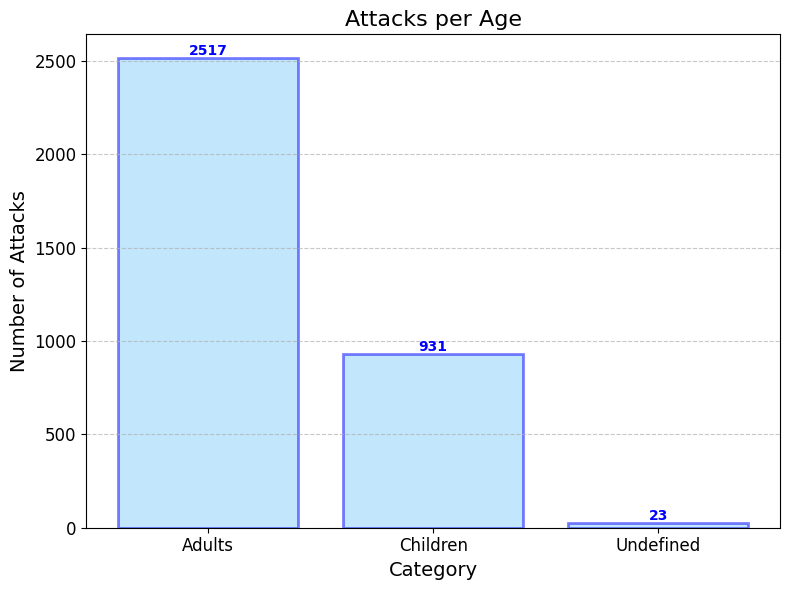

In [9]:
# import pandas as plt

# Make dataframe for this question
children_df = df.copy()

# Create a Subset without Nan values
children_df.dropna(subset=['Age'], inplace=True)

# Extract the numbers from the age column
children_df['Extracted_age'] = children_df['Age'].apply(extract_number)

sum_undefined = (children_df["Extracted_age"]=="Undefined").sum()

# Filter out the 'Undefined' values for the comparison
children_without_undefined = children_df.loc[children_df["Extracted_age"] != "Undefined"]
sum_adults = (children_without_undefined["Extracted_age"]>=18).sum()
sum_children = (children_without_undefined["Extracted_age"]<18).sum()

# Create a DataFrame to hold the categories and values
category_df = pd.DataFrame({
    'Category': ['Adults', 'Children','Undefined'],
    'Values': [sum_adults, sum_children, sum_undefined]
})

# Sort the DataFrame by Values in descending order
category_df.sort_values('Values', ascending=False, inplace=True)

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust the figure size
bars = plt.bar(category_df['Category'], category_df['Values'], color='lightskyblue', edgecolor='blue', alpha=0.5, linewidth=2)

# Add labels to the bars
for bar, value in zip(bars, category_df['Values']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value),
             ha='center', va='bottom',color='blue', fontweight='bold')

# Set plot labels and title
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.title('Attacks per Age', fontsize=16)

# Customize ticks and gridlines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Improve spacing between elements
plt.show()


#Question 3
##Are shark attacks where sharks were provoked more or less dangerous?


##Ideas to think about:
- Explain assumptions: What does Dangerous mean? Fatal or just an attack?
- How is the filtering done
- Use of figures?

Optional: Look for provoked/fatal attacks in the injury column

##Made Assumptions:
- Boating, Sea Disaster, Boat or Boatomg are considered unprovoked
- If the attack was questionable being provoked or unprovoked it will not be considered in the analyses.
- Percentage of missing values in the species column is 0%, for the fatal column this was 9% these values are omitted

#Conclusion
The majority of attacks (resulting in a fatal outcome) is unprovoked. The percentage of unprovoked attacks resulting in a fatal outcome is 26%. The percentage of fatal attacks resulting of unprovoked attacks is 3%.   

In [10]:
# Create Dataframe for this question
provoked_df = df.copy()

# provoked_df["Type"].value_counts()

In [11]:
def categorize_type(value):
    if value in ['Provoked', 'Unprovoked', 'Invalid']:
      return value
    elif value == 'Questionable':
      value = None
    else:
      return 'Unprovoked'

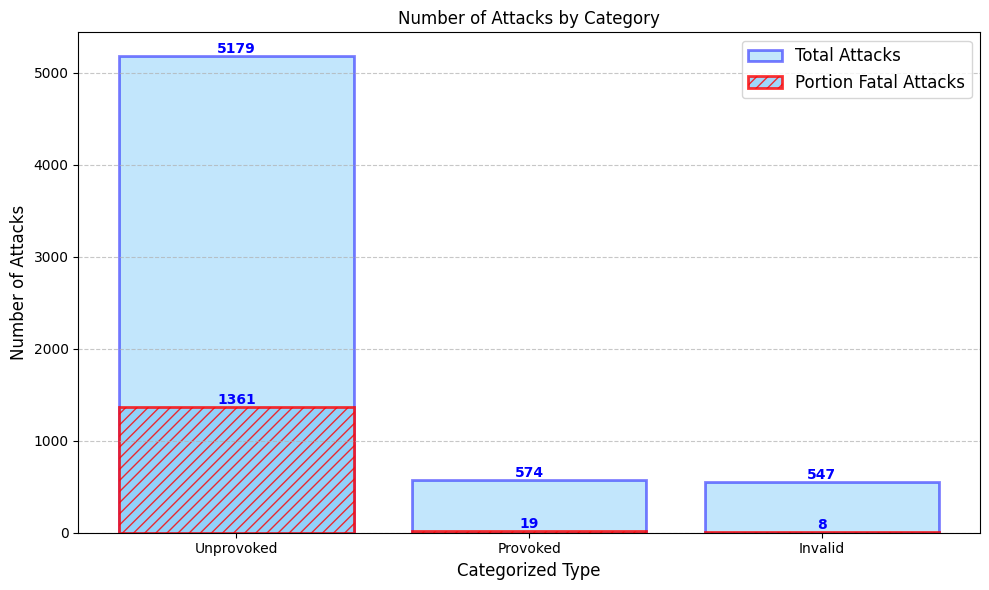

In [12]:
# Replace the 'Type' column with the categorized values using the defined function
provoked_df['Categorized_type'] = provoked_df['Type'].apply(categorize_type)

# Filter rows where 'Fatal' is True
provoked_df['Is_Fatal'] = provoked_df['Fatal'] == 'Y'

# Count the total attacks by species
total_types = provoked_df.groupby('Categorized_type').size()

# Group by 'Categorized_type' and then calculate the sum of the 'Is_Fatal' column
fatal_counts = provoked_df.groupby('Categorized_type')['Is_Fatal'].sum()

# Combine the total and fatal counts into a single DataFrame
final_provoked_df = pd.DataFrame({'Total': total_types, 'Fatal': fatal_counts})

# Sort the DataFrame by total attacks in descending order
final_provoked_df = final_provoked_df.sort_values(by='Total', ascending=False)


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over categories and create bars
for attacks, color, edgecolor, alpha, hatch, label in [('Total', 'lightskyblue', 'blue', 0.5, None, 'Total Attacks'),
                                                       ('Fatal', 'lightskyblue', 'red', 0.8, '///', 'Portion Fatal Attacks')]:
    bars = ax.bar(final_provoked_df.index, final_provoked_df[attacks], label=label, color=color, edgecolor=edgecolor, linewidth=2, alpha=alpha, hatch=hatch)

    # Annotate each bar with the corresponding value
    for bar in bars:
        height = bar.get_height()
        if np.isnan(height):
            height = 0
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',color='blue', fontweight='bold', ha='center', va='bottom')


# Add labels and title
plt.xlabel('Categorized Type', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Number of Attacks by Category')
plt.xticks(rotation=0)  # Rotates x-axis labels if they are long
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize = 12)

# Show the plot
plt.tight_layout()  # Improve spacing between elements
plt.show()


#Question 4
##Are certain activities more likely to result in a shark attack?

##Ideas to think about:
- Explain assumptions: Have the activities been categorised?
- How is the filtering done
- Use of figures?

##Made Assumptions:
- A lot of activities that involve being in the water for recreative purposes. These activities are not categorized under 1 activity: Swimming, Bathing, Wading, Floating, Snorkeling, Standing, Playing, Walking
- All activities involving some sort of boat are categorized under boathing
- Percentage of missing values in the Activity column is 9%, they have been omitted.

#Conclusion
The activities swimming, surfing and fishing result often in a shark attacks compared to other activities.


In [13]:
# Create new dataframe for last question
activity_df = df.copy()

# Create a Subset without Nan values
activity_df.dropna(subset=['Activity'], inplace=True)
# activity_df["Activity"].value_counts()

In [14]:
# Activity Categorization functions (with a lot of assumptions)
def categorize_activity(activity):
    if 'surf' in activity.lower() or 'boarding' in activity.lower():
        return 'Surfing'
    # elif 'swim' in activity.lower() or 'wading' in activity.lower() or 'bathing' in activity.lower() or 'float' in activity.lower() or 'snorkeling' in activity.lower() or 'walking' in activity.lower() or 'playing' in activity.lower() or 'standing' in activity.lower():
    #     return 'Swimming'
    elif 'swim' in activity.lower() :
        return 'Swimming'
    elif 'fish' in activity.lower():
        return 'Fishing'
    elif 'bath' in activity.lower():
        return 'Bathing'
    elif 'diving' in activity.lower() or 'dive' in activity.lower():
        return 'Diving'
    elif 'boat' in activity.lower() or 'yacht' in activity.lower() or 'cano' in activity.lower() or 'kayaking' in activity.lower() or 'sailing' in activity.lower() or 'rowing' in activity.lower():
        return 'Boating'
    else:
        return activity



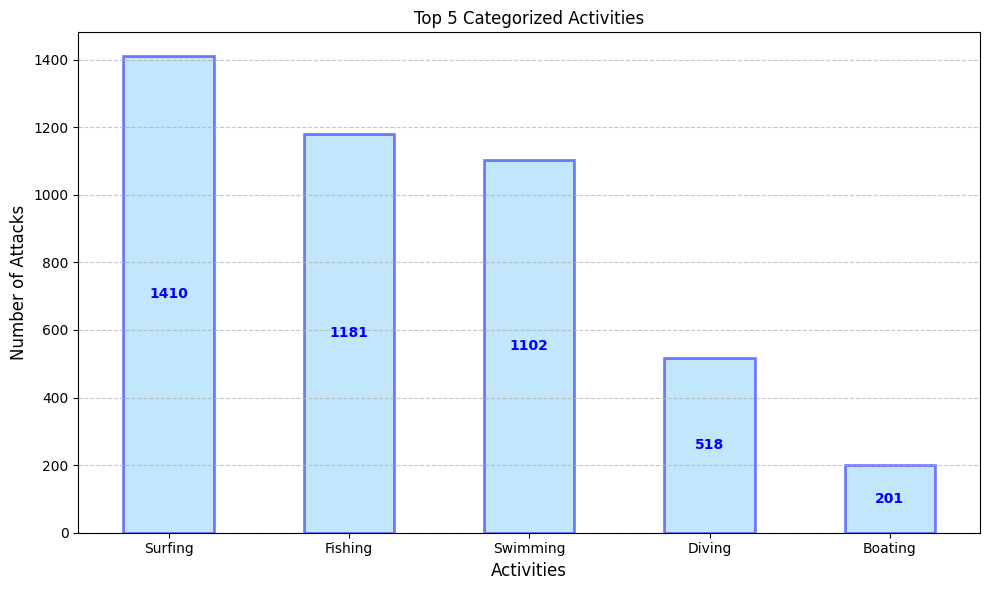

In [15]:
# Appy Activity categorization function
activity_df['Categorized_activity'] = activity_df['Activity'].apply(categorize_activity)

# Assuming activity_df['Categorized_activity'].value_counts().head(5) is stored in a variable
top_5_activities = activity_df['Categorized_activity'].value_counts().head(5)

# Create a figure and a set of subplots (in this case, just one)
fig, ax = plt.subplots(figsize=(10,6))  # you can set the size as you like

# Plot the bar chart
top_5_activities.plot(kind='bar', ax=ax, color='lightskyblue',  edgecolor='blue', alpha=0.5, linewidth=2)

# Adding labels and title
plt.xlabel('Activities', fontsize = 12)
plt.ylabel('Number of Attacks', fontsize = 12)
plt.title('Top 5 Categorized Activities')
plt.xticks(rotation=0)  # Rotating the x-axis labels to make them more readable

# Adding the value counts above the bars
for i, v in enumerate(top_5_activities):
    ax.text(i, v/2, str(v), color='blue', fontweight='bold', ha='center', va='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Improve spacing between elements
plt.show()